In [28]:
# !pip install tensorflow
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# import cv2
# path =r'/kaggle/input/ecg-image-data/ECG_Image_data/test/F/F0.png'
# x=cv2.imread(path)
# print(x.shape)

# x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
# print(x.shape)
# x = cv2.merge((x,x,x))
# print(x.shape)
# x = cv2.resize(x,(224,224))

# # plt.imshow(x, cmap='gray')

# pred = best_model.predict(x.reshape(1,224,224,3), batch_size=1)
# print(pred.argmax())

# N: Normal beat
# S: Supraventricular premature beat
# V: Premature ventricular contraction
# F: Fusion of ventricular and normal beat
# Q: Unclassifiable beat
# M: myocardial infarction

# train set

In [13]:
%%time
dir = Path('ECG_Image_data/train')

filepaths = list(dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe = pd.concat([filepaths , labels] , axis=1)
dataframe

CPU times: total: 2.25 s
Wall time: 3.4 s


,Filepath,Label
0,ECG_Image_data\train\F\F1.png,F
1,ECG_Image_data\train\F\F10.png,F
2,ECG_Image_data\train\F\F100.png,F
3,ECG_Image_data\train\F\F101.png,F
4,ECG_Image_data\train\F\F102.png,F
...,...,...
99194,ECG_Image_data\train\V\V995.png,V
99195,ECG_Image_data\train\V\V996.png,V
99196,ECG_Image_data\train\V\V997.png,V
99197,ECG_Image_data\train\V\V998.png,V


In [14]:
dataframe['Label'].value_counts()

Label
N    75709
M     8405
Q     6431
V     5789
S     2223
F      642
Name: count, dtype: int64

In [15]:
samples = []
for category in ['N','M','Q','V','S','F']:
    category_slice = dataframe.query("Label == @category")
    samples.append(category_slice.sample(640, random_state=1))

dataframe_train = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dataframe_train['Label'].value_counts()

Label
N    640
Q    640
S    640
F    640
M    640
V    640
Name: count, dtype: int64

In [16]:
"""
dir = Path('../input/ecg-image-data/ECG_Image_data/train')

filepaths = list(dir.glob(r'F/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

F = pd.concat([filepaths , labels] , axis=1)
F
"""

"\ndir = Path('../input/ecg-image-data/ECG_Image_data/train')\n\nfilepaths = list(dir.glob(r'F/*.png'))\nlabels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))\n\nfilepaths = pd.Series(filepaths, name='Filepath').astype(str)\nlabels = pd.Series(labels, name='Label')\n\nF = pd.concat([filepaths , labels] , axis=1)\nF\n"

In [9]:
"""
dataframe_train = pd.concat([F , dataframe1] , axis=0)
dataframe_train['Label'].value_counts()
"""

"\ndataframe_train = pd.concat([F , dataframe1] , axis=0)\ndataframe_train['Label'].value_counts()\n"

In [17]:
dataframe_train

,Filepath,Label
0,ECG_Image_data\train\N\N80645.png,N
1,ECG_Image_data\train\Q\Q644.png,Q
2,ECG_Image_data\train\S\S2383.png,S
3,ECG_Image_data\train\S\S2269.png,S
4,ECG_Image_data\train\F\F138.png,F
...,...,...
3835,ECG_Image_data\train\S\S1594.png,S
3836,ECG_Image_data\train\M\M5641.png,M
3837,ECG_Image_data\train\M\M8804.png,M
3838,ECG_Image_data\train\N\N46498.png,N


# test set

In [18]:
%%time
dir = Path('/kaggle/input/ecg-image-data/ECG_Image_data/test')

filepaths = list(dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

dataframe_test = pd.concat([filepaths , labels] , axis=1)
dataframe_test

CPU times: total: 0 ns
Wall time: 6.99 ms


,Filepath,Label


In [19]:
dataframe_test['Label'].value_counts()

Series([], Name: count, dtype: int64)

In [20]:
samples = []
for category in ['N','M','Q','V','S','F']:
    category_slice = dataframe_test.query("Label == @category")
    samples.append(category_slice.sample(160, random_state=1))

dataframe_test = pd.concat(samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
dataframe_test['Label'].value_counts()

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
"""
dir = Path('../input/ecg-image-data/ECG_Image_data/test')

filepaths = list(dir.glob(r'F/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

F1 = pd.concat([filepaths , labels] , axis=1)
F1
"""

In [ ]:
"""
dataframe_test = pd.concat([F1 , dataframe_test] , axis=0)
dataframe_test['Label'].value_counts()
"""

In [ ]:
dataframe_test

# Image generators

In [21]:
def gray_torgb(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.merge((image,image,image))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image


In [24]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=gray_torgb,
    rescale=1./255,
    validation_split=0.2
  
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=gray_torgb,
    rescale=1./255
)

NameError: name 'tf' is not defined

In [23]:
size=224
color_mode='rgb'
batch_size=32

train_images = train_generator.flow_from_dataframe(
    dataframe=dataframe_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=dataframe_train,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=dataframe_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(size, size),
    color_mode=color_mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

NameError: name 'train_generator' is not defined

In [14]:
test_images.class_indices

{'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}

In [ ]:
plt.imshow(test_images[0][0][3])

# Modeling

In [ ]:

# from tensorflow.keras.applications.vgg16 import VGG16

# pretrained_model = VGG16(
#                               input_shape=(224,224,3),
#                               include_top= False,
#                               weights='imagenet',
#                               pooling='avg'
#                               )

# pretrained_model.trainable = False


In [16]:

from tensorflow.keras.applications import ResNet50
pretrained_model = ResNet50(
                              input_shape=(224,224,3),
                              include_top= False,
                              weights='imagenet',
                              pooling='avg'
                              )

pretrained_model.trainable = False


In [17]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

model = Sequential ([
                        pretrained_model,
                        Flatten(),
                        Dropout(0.2),
                        Dense(128, activation='relu'),
                        Dense(64, activation='relu'),
                        Dense(6, activation='softmax')
                    ])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 23,858,630
Trainable params: 270,918
Non-trainable params: 23,587,712
______________________________________

In [ ]:
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import *



# model = Sequential ()
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(size,size,1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))


# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))

# model.summary()

In [18]:
import keras
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
            metrics=['accuracy',
                     'Precision',
                     'Recall',
                     tf.keras.metrics.AUC(
                                    num_thresholds=200,
                                    curve="ROC",
                                    summation_method="interpolation",
                                    multi_label=False
                                    )])

In [45]:
%%time
result=model.fit(
    train_images,
    steps_per_epoch=3072//32,
    validation_data=val_images,
    validation_steps=768//32,
    epochs=10,
    callbacks=[checkpoint]
)
# 50 epochs 

Epoch 1/10
96/96 [==============================] - 23s 244ms/step - loss: 0.1416 - accuracy: 0.9486 - precision: 0.9486 - recall: 0.9482 - auc: 0.9972 - val_loss: 0.1016 - val_accuracy: 0.9727 - val_precision: 0.9727 - val_recall: 0.9727 - val_auc: 0.9990

Epoch 00001: val_accuracy did not improve from 0.97266
Epoch 2/10
96/96 [==============================] - 24s 247ms/step - loss: 0.1406 - accuracy: 0.9476 - precision: 0.9475 - recall: 0.9466 - auc: 0.9971 - val_loss: 0.1055 - val_accuracy: 0.9622 - val_precision: 0.9622 - val_recall: 0.9622 - val_auc: 0.9980

Epoch 00002: val_accuracy did not improve from 0.97266
Epoch 3/10
96/96 [==============================] - 24s 255ms/step - loss: 0.1456 - accuracy: 0.9440 - precision: 0.9443 - recall: 0.9434 - auc: 0.9974 - val_loss: 0.0884 - val_accuracy: 0.9622 - val_precision: 0.9622 - val_recall: 0.9622 - val_auc: 0.9992

Epoch 00003: val_accuracy did not improve from 0.97266
Epoch 4/10
96/96 [==============================] - 24s 248ms

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10
96/96 [==============================] - 24s 248ms/step - loss: 0.1358 - accuracy: 0.9515 - precision: 0.9524 - recall: 0.9515 - auc: 0.9976 - val_loss: 0.0774 - val_accuracy: 0.9609 - val_precision: 0.9609 - val_recall: 0.9609 - val_auc: 0.9994

Epoch 00006: val_accuracy did not improve from 0.97917
Epoch 7/10
96/96 [==============================] - 23s 243ms/step - loss: 0.1576 - accuracy: 0.9427 - precision: 0.9433 - recall: 0.9427 - auc: 0.9967 - val_loss: 0.0899 - val_accuracy: 0.9753 - val_precision: 0.9753 - val_recall: 0.9753 - val_auc: 0.9989

Epoch 00007: val_accuracy did not improve from 0.97917
Epoch 8/10
96/96 [==============================] - 23s 239ms/step - loss: 0.1347 - accuracy: 0.9492 - precision: 0.9495 - recall: 0.9479 - auc: 0.9977 - val_loss: 0.1680 - val_accuracy: 0.9362 - val_precision: 0.9362 - val_recall: 0.9362 - val_auc: 0.9976

Epoch 00008: val_accuracy did not improve from 0.97917
Epoch 9/10
96/96 [==============================] - 24s 245ms

# Result

In [46]:
from keras.models import load_model
best_model=load_model('/kaggle/working/best_model.h5')
results = best_model.evaluate(test_images, verbose=0)

print("     Test Loss: {:.4f}".format(results[0]))
print(" Test Accuracy: {:.4f}%".format(results[1] * 100))
print("Test Precision: {:.4f}%".format(results[2] * 100))
print("   Test Recall: {:.4f}%".format(results[3] * 100))
print("      Test AUC: {:.4f}".format(results[4] ))


     Test Loss: 0.0995
 Test Accuracy: 96.5625%
Test Precision: 96.5625%
   Test Recall: 96.5625%
      Test AUC: 0.9986


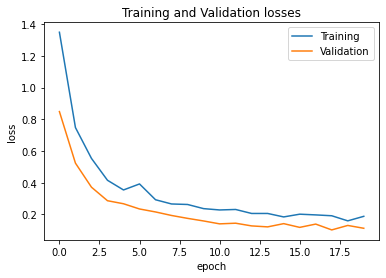

In [22]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig( 'loss.jpg', dpi=500, bbox_inches = 'tight')

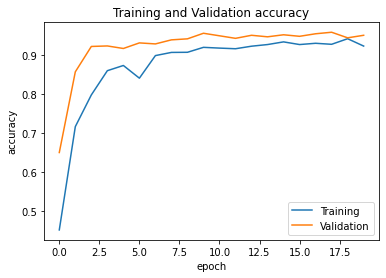

In [23]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.savefig( 'accuracy.jpg', dpi=500, bbox_inches = 'tight')


In [47]:
y_pred = best_model.predict(test_images)
y_pred

array([[7.11063222e-11, 9.60663319e-01, 3.30737017e-33, 6.52013812e-24,
        3.93367000e-02, 2.84745427e-09],
       [9.03141022e-01, 1.87328320e-10, 4.66757268e-14, 2.21026494e-06,
        1.04018814e-04, 9.67527181e-02],
       [7.81641938e-06, 1.22748507e-17, 3.88809058e-05, 9.99840736e-01,
        3.65584651e-13, 1.12545538e-04],
       ...,
       [8.31732631e-01, 1.77777448e-09, 7.71955166e-15, 7.29003546e-07,
        4.06695937e-04, 1.67859972e-01],
       [1.61492456e-13, 9.98916388e-01, 1.18710415e-35, 5.68868861e-28,
        1.08360581e-03, 2.82823417e-12],
       [3.88076593e-09, 1.48375189e-21, 9.99748170e-01, 2.51826074e-04,
        1.95355431e-16, 2.73573542e-09]], dtype=float32)

In [48]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 3, 3, 3, 1, 0, 1, 2, 2, 5, 3, 1, 2, 4, 1, 2, 4, 5, 2, 1, 3,
       4, 2, 4, 4, 1, 3, 2, 5, 3, 1, 2, 2, 2, 3, 1, 5, 1, 5, 0, 5, 1, 3,
       1, 4, 1, 4, 1, 0, 2, 2, 0, 3, 3, 0, 0, 0, 4, 0, 3, 5, 2, 5, 3, 0,
       5, 3, 1, 5, 1, 5, 5, 5, 5, 3, 0, 2, 0, 2, 0, 0, 4, 3, 2, 5, 2, 4,
       5, 5, 4, 5, 0, 1, 4, 2, 4, 1, 4, 2, 5, 2, 4, 5, 4, 4, 1, 0, 1, 4,
       2, 4, 4, 5, 2, 2, 2, 3, 3, 3, 0, 2, 4, 0, 1, 3, 4, 1, 1, 5, 4, 5,
       2, 4, 2, 0, 3, 3, 2, 0, 1, 2, 1, 3, 0, 5, 4, 3, 2, 1, 5, 3, 4, 1,
       1, 2, 1, 3, 5, 3, 3, 5, 5, 3, 4, 1, 4, 0, 3, 0, 5, 4, 1, 1, 0, 0,
       2, 5, 5, 2, 0, 0, 1, 3, 4, 1, 4, 1, 4, 2, 1, 4, 3, 4, 1, 4, 0, 0,
       5, 1, 5, 5, 5, 0, 1, 2, 0, 2, 4, 0, 0, 3, 0, 4, 2, 4, 1, 0, 5, 0,
       5, 0, 3, 2, 1, 2, 5, 5, 2, 4, 1, 2, 4, 0, 5, 2, 5, 5, 4, 1, 3, 2,
       4, 4, 5, 5, 0, 3, 2, 3, 2, 4, 2, 3, 4, 4, 3, 3, 0, 0, 4, 0, 2, 1,
       5, 1, 3, 2, 5, 5, 1, 5, 3, 0, 5, 2, 0, 1, 4, 5, 4, 4, 0, 0, 2, 3,
       3, 2, 0, 5, 4, 3, 1, 2, 1, 0, 1, 0, 5, 2, 3,

# classification report & confusion matrix

In [49]:
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(test_images.labels, y_pred)
print(cm)

report = classification_report(test_images.labels, y_pred, target_names=['F', 'M', 'N', 'Q', 'S', 'V'],digits=4)
print(report )

def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df
report = report_to_df(report)

report.to_csv('classification report.csv', index=True)



[[148   0   0   0   0  12]
 [  0 157   0   0   3   0]
 [  0   0 160   0   0   0]
 [  0   0   3 157   0   0]
 [  0   2   0   0 157   1]
 [ 12   0   0   0   0 148]]
              precision    recall  f1-score   support

           F     0.9250    0.9250    0.9250       160
           M     0.9874    0.9812    0.9843       160
           N     0.9816    1.0000    0.9907       160
           Q     1.0000    0.9812    0.9905       160
           S     0.9812    0.9812    0.9812       160
           V     0.9193    0.9250    0.9221       160

    accuracy                         0.9656       960
   macro avg     0.9658    0.9656    0.9657       960
weighted avg     0.9658    0.9656    0.9657       960



# ploting the confusion matrix


Confusion matrix, without normalization


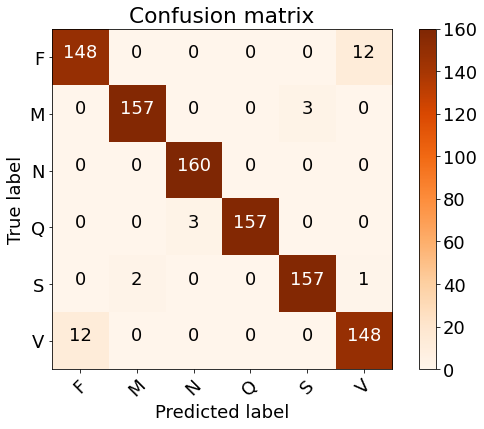

In [53]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.rcParams['font.size'] = '20'
    
    
plot_confusion_matrix(cm, classes=['F', 'M', 'N', 'Q', 'S', 'V'],normalize=False,title='Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion matrix' + '.jpg', dpi=500, bbox_inches = 'tight')


Normalized confusion matrix


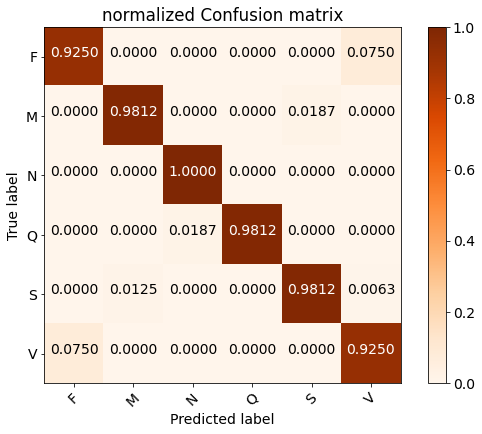

In [55]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.rcParams['font.size'] = '16'
    
    
plot_confusion_matrix(cm, classes=['F', 'M', 'N', 'Q', 'S', 'V'],normalize=True,title='normalized Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('normalized confusion matrix' + '.jpg', dpi=500, bbox_inches = 'tight')
